# Introduction to Simple Linear Regression


## Learning Objectives and outcomes

- Introduction of linear regression in the simple setting.

- Terminology - 'intercept', 'coefficient'.

- Least Square method
    
- Implement linear regression in sklearn.




In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read data to a dataframe

data = pd.read_csv('data/kc_house_data.csv')[['sqft_living', 'price']]

data.price /=1000

display(data.head())

print(data.shape)


,sqft_living,price
0,1180,221.9
1,2570,538.0
2,770,180.0
3,1960,604.0
4,1680,510.0


(21613, 2)


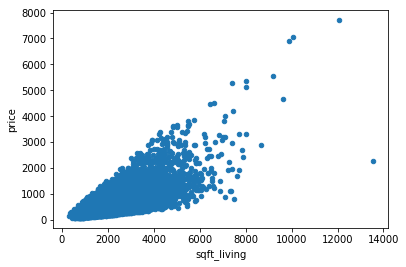

In [3]:
data.plot(kind = 'scatter', x = 'sqft_living', y= 'price')
plt.show()

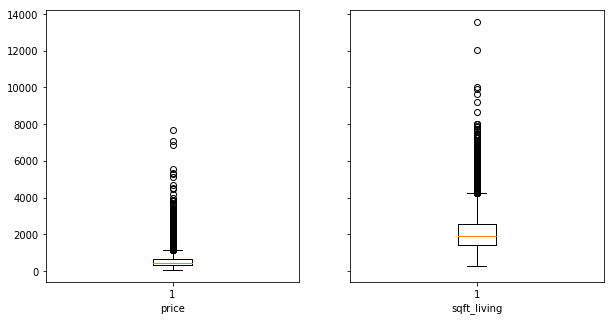

In [4]:
## visualize the 'price' and 'sqft_living'

fig, axs = plt.subplots(1,2, figsize = (10,5), sharey= True)

axs[0].boxplot(data.price)
axs[0].set_xlabel('price')

axs[1].boxplot(data.sqft_living)
axs[1].set_xlabel('sqft_living')

plt.show()

In [5]:
# here let's cut the data with 0.95 percentile threshold

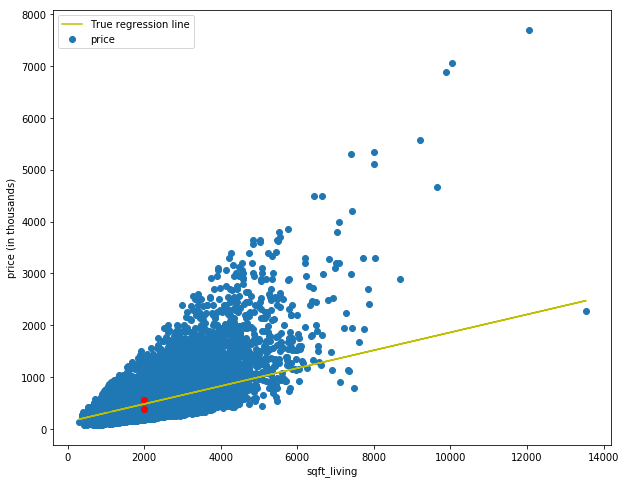

In [6]:
# Let's visualize the data one more time
plt.figure(figsize= (10,8))
plt.scatter(x = data.sqft_living, y =data.price)


plt.plot(data.sqft_living.values,
         137.37 + data.sqft_living.values*0.1727,
         c= 'y', label = 'True regression line')

plt.scatter(x = data.loc[1038].sqft_living, y = data.loc[1038].price, c ='r')

plt.scatter(x = data.loc[1699].sqft_living, y = data.loc[1699].price, c ='r')

plt.xlabel('sqft_living')
plt.ylabel('price (in thousands)')

plt.legend()
plt.show()

### Assumptions

* Assume $\mbox{price} \approx \mbox{sqft_living}$  linearly.

* There is an initial value (baseline) of the price. 

* Data might not be exactly linear but the errors are random.

### Model  - Single Variable Case

$$ Y = b_{0} + b_{1}X + \epsilon$$
 
- $ b_{0}, b_{1}$ are called the intercept and coefficient of the linear model respectively. 

- $\epsilon$ is the error term.

- Given $\widehat{b_{0}}$ and $\widehat{b_{1}}$ we will make a prediction:

$$ \widehat{y_{i}} = \widehat{b_{0}} + \widehat{b_{1}} x_{i} $$

<img src="best_fit.png" cap="Transformed dataset"  width='300'/>



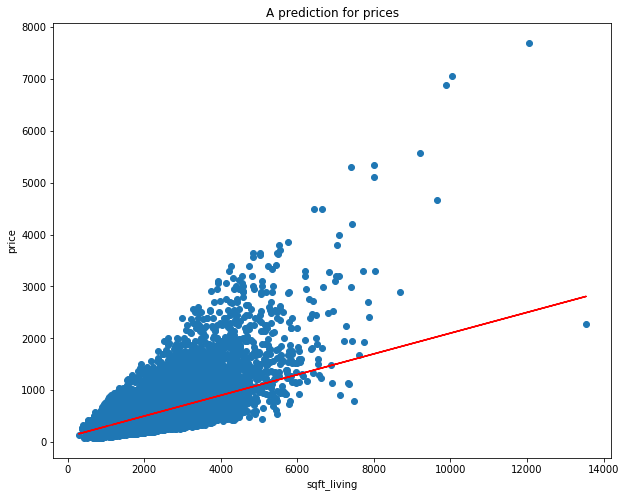

In [7]:

X = data.sqft_living.values
y = data.price.values


def pred(b0_hat, b1_hat):
    y_pred = b0_hat + b1_hat * X
    
    
    data['predicted'] = y_pred
    
    # Data for plotting
    t = data.sqft_living.values
    s = data.predicted.values
    
    plt.figure(figsize= (10,8))

    

    plt.scatter(x= data.sqft_living, y= data.price)
    plt.plot(t, s, c= 'r')

    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.title('A prediction for prices')

    plt.show()
    return 

pred(100, 0.2)


### What do we mean by 'best fitting line'? Least Squares

<a name="least_squares">
</a>

__Q: How to find 'best' line?__





* Recall that we know actual values $y$ for the prices and for any coefficients $b_{0}, b_{1}$ we can make a prediction $\widehat{y}$. 

* Error for each prediction $e_{i} = y_{i} - \widehat{y_{i}}$



### Residual sum of squares


$$RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{n}^{2}$$

* Wait a minute! Why do we get the squares?


The least square method minimizes the RSS.

* Good news: The least square can be calculated exactly because it has a closed form:

$$ \mbox{RSS} = (y_1 - \widehat{b_{0}} -\widehat{b_{1}}x_{1} )^{2} + (y_2 - \widehat{b_{0}} -\widehat{b_{1}}x_{2} )^{2} + \cdots + (y_n - \widehat{b_{0}} -\widehat{b_{1}}x_{n} )^{2}$$

* Bad news: It requires derivatives and is complicated to derive. But no worries, python will take care of this step for us.

$$ b_{0} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

and 

$$ b_0 = \bar{y} - b_{1}\bar{x} $$


Let's see linear regression in action.


<a name="sklearn">
</a>

## Linear Regression Using sklearn

In [8]:
# define X and y again here and reshape them


# import LinearRegression from sklearn


# Initialize the LinearRegression Object

# Fit the model

# print intercept and coef attributes of LinerRegression Object




In [9]:
## call pred function to see the 'best fitting line'

## Further Reading <a name='further_reading'></a>

- https://newonlinecourses.science.psu.edu/stat501/node/252/

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

- https://lagunita.stanford.edu/assets/courseware/v1/e4f2f4823252ead8c1a68722e3415c28/c4x/HumanitiesSciences/StatLearning/asset/linear_regression-handout.pdf